# Local AutoML training

### Ressources
- https://github.com/automl/auto-sklearn/issues/1684
- https://geemap.org/notebooks/46_local_rf_training/

## Install auto-sklearn

In [1]:
# 1. uninstall all affected packages
!pip uninstall -y Cython scipy pyparsing scikit_learn imbalanced-learn mlxtend yellowbrick

Found existing installation: Cython 3.0.6
Uninstalling Cython-3.0.6:
  Successfully uninstalled Cython-3.0.6
Found existing installation: scipy 1.11.4
Uninstalling scipy-1.11.4:
  Successfully uninstalled scipy-1.11.4
Found existing installation: pyparsing 3.1.1
Uninstalling pyparsing-3.1.1:
  Successfully uninstalled pyparsing-3.1.1
Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
Found existing installation: imbalanced-learn 0.10.1
Uninstalling imbalanced-learn-0.10.1:
  Successfully uninstalled imbalanced-learn-0.10.1
Found existing installation: mlxtend 0.22.0
Uninstalling mlxtend-0.22.0:
  Successfully uninstalled mlxtend-0.22.0
Found existing installation: yellowbrick 1.5
Uninstalling yellowbrick-1.5:
  Successfully uninstalled yellowbrick-1.5


In [2]:
# 2. install packages to be downgraded
!pip install Cython==0.29.36 scipy==1.9 pyparsing==2.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.7.13 requires scikit-learn, which is not installed.
librosa 0.10.1 requires scikit-learn>=0.20.0, which is not installed.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
sklearn-pandas 2.2.0 requires scikit-learn>=0.23.0, which is not installed.
httplib2 0.22.0 requires pyparsing!=3.0.0,!=3.0.1,!=3.0.2,!=3.0.3,<4,>=2.4.2; python_version > "3.0", but you have pyparsing 2.4.0 which is incompatible.


In [1]:
# 3. install older scikit-learn disregarding its dependencies
!pip install scikit-learn==0.24.2 --no-build-isolation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 17.8 MB/s eta 0:00:00
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-learn: filename=scikit_learn-0.24.2-cp310-cp310-linux_x86_64.whl size=22231981 sha256=9a9fe96568cc68460c3b79771f84b63b5f4bb166c31195cb6c94c4dd9bfe582b
  Stored in directory: /root/.cache/pip/wheels/13/a4/68/4e78865652fa14db4a162b491e5138565f97646f9e1f2ab8cc
Successfully built scikit-learn
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.17.0 requires scikit-learn>=1.2.2, but you have scikit-learn 0.24.2 which is incompatible.


In [2]:
# 4. finally install auto-sklearn
!pip install auto-sklearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 31.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 59.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.9/260.9 kB 24.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 2.8 MB/s eta 0:00:00
  Created wheel for auto-sklearn: filename=auto_sklearn-0.15.0-py3-none-any.whl size=6641936 sha256=e0cb7c6959a176bd61134e5d62638abc42614a8a369c9172ff407386b6ba6831
  Stored in directory: /root/.cache/pip/wheels/4d/0a/f9/8c1a06bcc36bc16b467b044b5bb03a90f92a5c5e6cd443414b
  Created wheel for pynisher: filename=pynisher-0.6.4-py3-none-any.whl

In [3]:
# 5. then, try loading the package repeatedly until trash in its dependencies are clean
#import autosklearn

## Setup

In [1]:
from google.colab import drive
import pandas as pd
import autosklearn.classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/land_cover_classification_kaza/automl

/content/drive/MyDrive/land_cover_classification_kaza/automl


## Load train and test set

In [4]:
train = pd.read_csv('train.csv')
train

,B2,B3,B4,B5,B6,B7,B8,B8A,B11,B12,class,LC2023
0,550.333333,603.500000,543.777778,478.333333,278.666667,283.000000,221.500000,218.307692,210.333333,177.142857,6,Water
1,761.728571,969.202381,1498.000000,1952.222222,2275.200000,2539.833333,2663.555556,2903.750000,3354.500000,2217.666667,3,Forest
2,686.571429,861.375000,1446.666667,1899.500000,2319.500000,2613.333333,2893.600000,2994.000000,2897.333333,1894.500000,5,Shrub
3,636.750000,802.666667,1104.800000,1396.250000,1764.500000,2053.300000,2140.200000,2365.333333,2637.000000,1938.500000,2,Crop
4,664.000000,796.375000,1057.000000,1485.000000,1940.142857,2274.666667,2472.000000,2657.428571,2638.500000,1746.000000,3,Forest
...,...,...,...,...,...,...,...,...,...,...,...,...
879,661.500000,858.166667,969.666667,1338.000000,2023.500000,2213.000000,2264.000000,2474.000000,2632.750000,1977.500000,2,Crop
880,543.100000,551.000000,480.222222,400.555556,288.846154,290.066667,294.250000,282.250000,150.727273,110.857143,6,Water
881,623.000000,803.666667,1112.000000,1648.250000,2064.333333,2273.666667,2465.500000,2719.666667,3167.000000,1991.000000,5,Shrub
882,591.833333,787.166667,1300.666667,1807.571429,2147.750000,2498.375000,2636.500000,3046.200000,3105.500000,2122.000000,3,Forest


In [5]:
X_train = train.drop(['class', 'LC2023'], axis=1)
X_train

,B2,B3,B4,B5,B6,B7,B8,B8A,B11,B12
0,550.333333,603.500000,543.777778,478.333333,278.666667,283.000000,221.500000,218.307692,210.333333,177.142857
1,761.728571,969.202381,1498.000000,1952.222222,2275.200000,2539.833333,2663.555556,2903.750000,3354.500000,2217.666667
2,686.571429,861.375000,1446.666667,1899.500000,2319.500000,2613.333333,2893.600000,2994.000000,2897.333333,1894.500000
3,636.750000,802.666667,1104.800000,1396.250000,1764.500000,2053.300000,2140.200000,2365.333333,2637.000000,1938.500000
4,664.000000,796.375000,1057.000000,1485.000000,1940.142857,2274.666667,2472.000000,2657.428571,2638.500000,1746.000000
...,...,...,...,...,...,...,...,...,...,...
879,661.500000,858.166667,969.666667,1338.000000,2023.500000,2213.000000,2264.000000,2474.000000,2632.750000,1977.500000
880,543.100000,551.000000,480.222222,400.555556,288.846154,290.066667,294.250000,282.250000,150.727273,110.857143
881,623.000000,803.666667,1112.000000,1648.250000,2064.333333,2273.666667,2465.500000,2719.666667,3167.000000,1991.000000
882,591.833333,787.166667,1300.666667,1807.571429,2147.750000,2498.375000,2636.500000,3046.200000,3105.500000,2122.000000


In [6]:
y_train = train['class']
y_train

0      6
1      3
2      5
3      2
4      3
      ..
879    2
880    6
881    5
882    3
883    3
Name: class, Length: 884, dtype: int64

In [7]:
test = pd.read_csv('test.csv')
test

,B2,B3,B4,B5,B6,B7,B8,B8A,B11,B12,class,LC2023
0,666.571429,862.400000,1200.400000,1496.200000,1816.000000,2071.750000,2276.250000,2499.875000,2972.500000,2059.25,3,Forest
1,666.285714,841.000000,1120.800000,1576.333333,2086.500000,2424.500000,2607.000000,2770.666667,3045.500000,1971.00,5,Shrub
2,670.888889,928.600000,1438.000000,1837.750000,2140.500000,2412.857143,2576.750000,2857.500000,3065.000000,2187.50,7,Wetlands
3,1061.428571,1372.200000,1891.714286,2184.375000,2435.000000,2624.000000,2871.375000,2978.500000,4128.333333,3130.00,2,Crop
4,1180.750000,1704.666667,2536.000000,2854.600000,3177.333333,3459.500000,3719.000000,3864.500000,4646.000000,3445.00,0,Bare
...,...,...,...,...,...,...,...,...,...,...,...,...
374,611.000000,842.000000,1128.000000,1422.125000,1962.166667,2207.000000,2335.000000,2558.083333,2698.666667,2215.50,7,Wetlands
375,1561.733333,1830.400000,2213.214286,2686.550000,2806.925000,2906.000000,2595.444444,3103.500000,4402.714286,4194.00,1,BuiltUp
376,974.904762,1326.777778,1890.933333,2079.600000,2272.375000,2462.818182,2603.764706,2719.615385,3952.000000,3292.65,1,BuiltUp
377,594.162791,803.700000,1273.809524,1526.625000,1827.533333,2076.500000,2265.157895,2410.000000,3054.625000,2175.75,5,Shrub


In [8]:
X_test = test.drop(['class', 'LC2023'], axis=1)
X_test

,B2,B3,B4,B5,B6,B7,B8,B8A,B11,B12
0,666.571429,862.400000,1200.400000,1496.200000,1816.000000,2071.750000,2276.250000,2499.875000,2972.500000,2059.25
1,666.285714,841.000000,1120.800000,1576.333333,2086.500000,2424.500000,2607.000000,2770.666667,3045.500000,1971.00
2,670.888889,928.600000,1438.000000,1837.750000,2140.500000,2412.857143,2576.750000,2857.500000,3065.000000,2187.50
3,1061.428571,1372.200000,1891.714286,2184.375000,2435.000000,2624.000000,2871.375000,2978.500000,4128.333333,3130.00
4,1180.750000,1704.666667,2536.000000,2854.600000,3177.333333,3459.500000,3719.000000,3864.500000,4646.000000,3445.00
...,...,...,...,...,...,...,...,...,...,...
374,611.000000,842.000000,1128.000000,1422.125000,1962.166667,2207.000000,2335.000000,2558.083333,2698.666667,2215.50
375,1561.733333,1830.400000,2213.214286,2686.550000,2806.925000,2906.000000,2595.444444,3103.500000,4402.714286,4194.00
376,974.904762,1326.777778,1890.933333,2079.600000,2272.375000,2462.818182,2603.764706,2719.615385,3952.000000,3292.65
377,594.162791,803.700000,1273.809524,1526.625000,1827.533333,2076.500000,2265.157895,2410.000000,3054.625000,2175.75


In [9]:
y_test = test['class']
y_test

0      3
1      5
2      7
3      2
4      0
      ..
374    7
375    1
376    1
377    5
378    1
Name: class, Length: 379, dtype: int64

## Use auto-sklearn to find the best model/ensemble

### Open questions
- What's in the data preprocessor?
- What's in the feature preprocessor?
- How can we extract the most useful things and translate them to something that works with EE?

In [10]:
automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=60*60,
    resampling_strategy='cv',
    resampling_strategy_arguments={'folds': 10},
    metric=autosklearn.metrics.f1_macro,
    n_jobs=-1,
    ensemble_kwargs = {'ensemble_size': 1},
    include = {
        'classifier': ['decision_tree', 'extra_trees', 'gaussian_nb', 'gradient_boosting', 'k_nearest_neighbors', 'libsvm_svc', 'random_forest'],
        'feature_preprocessor': ['no_preprocessing']
    }
)

In [11]:
automl.fit(X_train, y_train)

AutoSklearnClassifier(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                      ensemble_kwargs={'ensemble_size': 1},
                      include={'classifier': ['decision_tree', 'extra_trees',
                                              'gaussian_nb',
                                              'gradient_boosting',
                                              'k_nearest_neighbors',
                                              'libsvm_svc', 'random_forest'],
                               'feature_preprocessor': ['no_preprocessing']},
                      metric=f1_macro, n_jobs=-1, per_run_time_limit=720,
                      resampling_strategy='cv',
                      resampling_strategy_arguments={'folds': 10})

In [12]:
y_train_pred = automl.predict(X_train)
y_test_pred = automl.predict(X_test)

## Evaluation

### Train set classification metrics

In [13]:
print('Accuracy: {:0.4f}'.format(accuracy_score(y_train, y_train_pred)))

Accuracy: 0.8586


In [14]:
print('Precision: {:0.4f}'.format(precision_score(y_train, y_train_pred, average='macro')))

Precision: 0.8460


In [15]:
print('Recall: {:0.4f}'.format(recall_score(y_train, y_train_pred, average='macro')))

Recall: 0.9097


In [16]:
print('F1-Score: {:0.4f}'.format(f1_score(y_train, y_train_pred, average='macro')))

F1-Score: 0.8690


In [17]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.76      0.98      0.85        45
           1       0.81      1.00      0.90        65
           2       0.91      0.84      0.87       158
           3       0.86      0.86      0.86       228
           4       0.72      1.00      0.83        58
           5       0.89      0.73      0.80       208
           6       1.00      0.88      0.94        74
           7       0.81      1.00      0.90        48

    accuracy                           0.86       884
   macro avg       0.85      0.91      0.87       884
weighted avg       0.87      0.86      0.86       884



In [18]:
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[ 44,   1,   0,   0,   0,   0,   0,   0],
       [  0,  65,   0,   0,   0,   0,   0,   0],
       [ 10,   7, 132,   1,   1,   2,   0,   5],
       [  0,   0,   3, 196,  10,  16,   0,   3],
       [  0,   0,   0,   0,  58,   0,   0,   0],
       [  1,   2,   9,  30,  12, 151,   0,   3],
       [  3,   5,   1,   0,   0,   0,  65,   0],
       [  0,   0,   0,   0,   0,   0,   0,  48]])

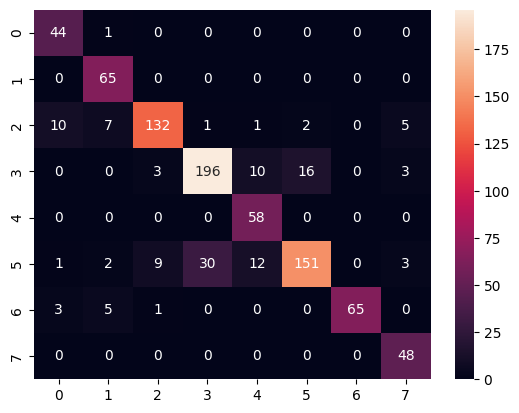

In [19]:
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

### Test set classifiction metrics

In [20]:
print('Accuracy: {:0.4f}'.format(accuracy_score(y_test, y_test_pred)))

Accuracy: 0.6227


In [21]:
print('Precision: {:0.4f}'.format(precision_score(y_test, y_test_pred, average='macro')))

Precision: 0.6181


In [22]:
print('Recall: {:0.4f}'.format(recall_score(y_test, y_test_pred, average='macro')))

Recall: 0.6558


In [23]:
print('F1-Score: {:0.4f}'.format(f1_score(y_test, y_test_pred, average='macro')))

F1-Score: 0.6148


In [24]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.29      0.64      0.40        14
           1       0.76      0.85      0.80        40
           2       0.73      0.74      0.73        65
           3       0.61      0.66      0.63        89
           4       0.29      0.58      0.39        19
           5       0.64      0.38      0.47        96
           6       0.96      0.69      0.81        39
           7       0.67      0.71      0.69        17

    accuracy                           0.62       379
   macro avg       0.62      0.66      0.61       379
weighted avg       0.66      0.62      0.63       379



In [25]:
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[ 9,  2,  2,  0,  0,  1,  0,  0],
       [ 4, 34,  2,  0,  0,  0,  0,  0],
       [12,  2, 48,  0,  0,  1,  1,  1],
       [ 0,  0,  1, 59, 11, 16,  0,  2],
       [ 1,  0,  1,  3, 11,  2,  0,  1],
       [ 1,  2, 10, 32, 14, 36,  0,  1],
       [ 4,  5,  2,  0,  0,  0, 27,  1],
       [ 0,  0,  0,  3,  2,  0,  0, 12]])

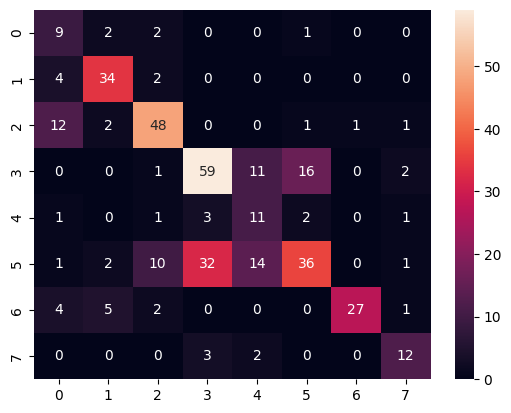

In [26]:
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

### AutoML evaluation

In [27]:
automl.leaderboard(ensemble_only=False)

,rank,ensemble_weight,type,cost,duration
model_id,,,,,
125,1,1.0,extra_trees,0.408690,33.519623
46,2,0.0,extra_trees,0.411050,39.361665
128,3,0.0,extra_trees,0.413628,36.577082
104,4,0.0,extra_trees,0.415643,35.504014
138,5,0.0,extra_trees,0.417462,38.596184
...,...,...,...,...,...
114,138,0.0,libsvm_svc,0.948745,6.697779
61,139,0.0,libsvm_svc,0.951377,15.969647
74,140,0.0,libsvm_svc,0.959067,12.649952


In [28]:
automl.leaderboard(ensemble_only=True)

,rank,ensemble_weight,type,cost,duration
model_id,,,,,
125,1,1.0,extra_trees,0.40869,33.519623


In [29]:
automl.get_models_with_weights()

[(1.0,
  SimpleClassificationPipeline({'balancing:strategy': 'weighting', 'classifier:__choice__': 'extra_trees', 'data_preprocessor:__choice__': 'feature_type', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:extra_trees:bootstrap': 'False', 'classifier:extra_trees:criterion': 'gini', 'classifier:extra_trees:max_depth': 'None', 'classifier:extra_trees:max_features': 0.6236446085257177, 'classifier:extra_trees:max_leaf_nodes': 'None', 'classifier:extra_trees:min_impurity_decrease': 0.0, 'classifier:extra_trees:min_samples_leaf': 1, 'classifier:extra_trees:min_samples_split': 11, 'classifier:extra_trees:min_weight_fraction_leaf': 0.0, 'data_preprocessor:feature_type:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessor:feature_type:numerical_transformer:rescaling:__choice__': 'power_transformer'},
  dataset_properties={
    'task': 2,
    'sparse': False,
    'multilabel': False,
    'multiclass': True,
    'target_type': 'classification',
    'signed

In [30]:
automl.show_models()

{125: {'model_id': 125,
  'rank': 1,
  'cost': 0.40869027886766307,
  'ensemble_weight': 1.0,
  'voting_model': VotingClassifier(estimators=None, voting='soft'),
  'estimators': [{'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice at 0x7da4601b2bc0>,
    'balancing': Balancing(random_state=1, strategy='weighting'),
    'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice at 0x7da44f5ac100>,
    'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice at 0x7da44f5afa00>,
    'sklearn_classifier': ExtraTreesClassifier(max_features=4, min_samples_split=11, n_estimators=512,
                         n_jobs=1, random_state=1, warm_start=True)},
   {'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice at 0x7da447a31930>,
    'balancing': Balancing(random_state=1, strategy='weighting'),
    'feature_preprocessor': <autosklearn.pipeli